In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
import time


In [2]:
data = df= pd.read_csv('encoded.csv')
X ,y = df.drop('isFraud', axis=1),df.isFraud
y = (y==1).astype(int)

In [3]:
from sklearn.model_selection import train_test_split
_, X_keep, _, y_keep = train_test_split(X, y, test_size=0.2)

In [4]:
def ordinary(X_train, X_test, y_train, y_test, model):
    DTC = model.fit(X_train, y_train)
    predictions = DTC.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support =metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    
    
    fpr, tpr, thresholds =roc_curve(y_test, predictions, pos_label=1)
    
    
    auc = metrics.auc(fpr, tpr)
    
    #y_pred_test_prob = grid.predict_proba(X_test)
    
   
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [5]:

def class_weight(X_train, X_test, y_train, y_test, model):
    
    model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

  
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [6]:
def Oversampling(X_train, X_test, y_train, y_test, model, sampler):
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')
        
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
        
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [4]:
def Undersampling(X_train, X_test, y_train, y_test, model,sampler):
    if sampler == 'NearMiss': sampler+=str(sampler.version)
    print(f'Technique: {sampler}')
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')

    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    
    print(fpr, tpr)
    
    auc = metrics.auc(fpr, tpr)
    

   
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, stratify=y_keep, test_size=0.2)

In [7]:
techniques = [RandomOverSampler(),
              SMOTE(),
              ADASYN(),
              RandomUnderSampler(),
              TomekLinks(),
              EditedNearestNeighbours()]

In [8]:
model = LogisticRegression()

## DecisionTreeClassifier

C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1:  0.39999999999999997
Cohen Kappa:  0.3991658039170678
Brier:  0.0016856250368362114
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254186
           1       0.36      0.45      0.40       319

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.68      0.72      0.70    254505
weighted avg       1.00      1.00      1.00    254505



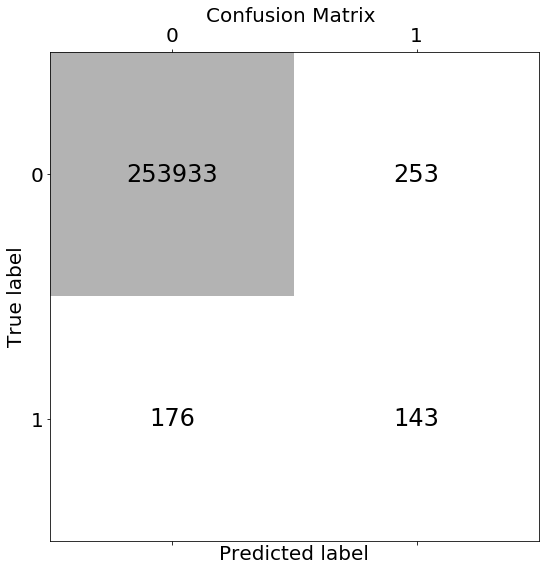

{'accuracy': 0.9983143749631638,
 'precision': array([0.99930738, 0.36111111]),
 'recall': array([0.99900467, 0.44827586]),
 'fscore': array([0.999156, 0.4     ]),
 'n_occurences': array([254186,    319], dtype=int64),
 'predictions_count': Counter({0: 254109, 1: 396}),
 'tp': 143,
 'tn': 253933,
 'fp': 253,
 'fn': 176,
 'auc': 0.7236402639717807}

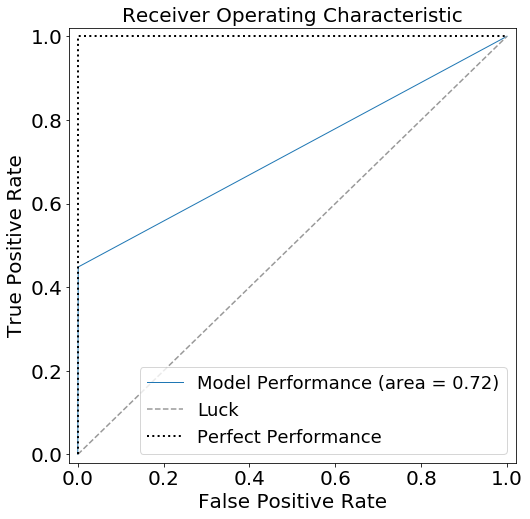

In [12]:
ordinary(X_train, X_test, y_train, y_test, model)


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1:  0.05379578835604318
Cohen Kappa:  0.051485138283329124
Brier:  0.04201882084831339
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    254186
           1       0.03      0.95      0.05       319

   micro avg       0.96      0.96      0.96    254505
   macro avg       0.51      0.96      0.52    254505
weighted avg       1.00      0.96      0.98    254505



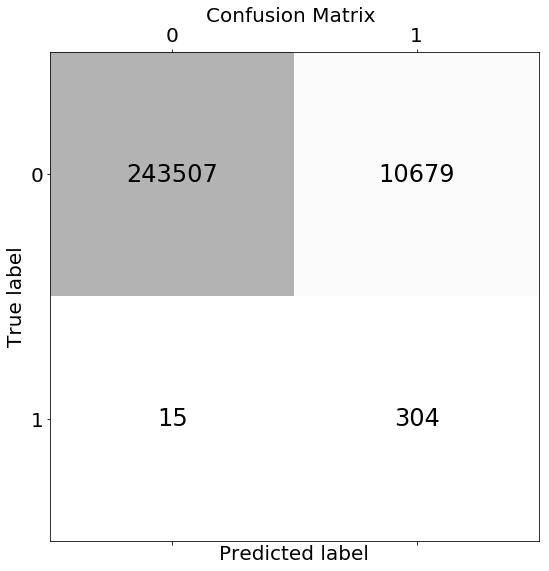

{'accuracy': 0.9579811791516866,
 'precision': array([0.9999384 , 0.02767914]),
 'recall': array([0.95798746, 0.95297806]),
 'fscore': array([0.97851351, 0.05379579]),
 'n_occurences': array([254186,    319], dtype=int64),
 'predictions_count': Counter({0: 243522, 1: 10983}),
 'tp': 304,
 'tn': 243507,
 'fp': 10679,
 'fn': 15,
 'auc': 0.9554827572147635}

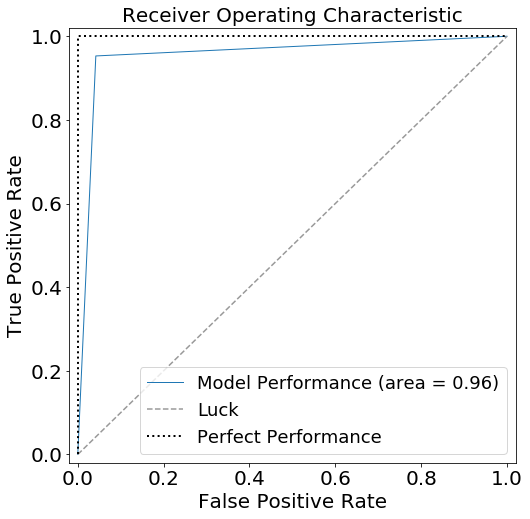

In [13]:
class_weight(X_train, X_test, y_train, y_test, model)


Before resampling: [(0, 1016742), (1, 1277)]
After resampling: [(0, 1016742), (1, 1016742)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1:  0.026742718219645613
Cohen Kappa:  0.024333368365726193
Brier:  0.0817940708434019
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    254186
           1       0.01      0.90      0.03       319

   micro avg       0.92      0.92      0.92    254505
   macro avg       0.51      0.91      0.49    254505
weighted avg       1.00      0.92      0.96    254505



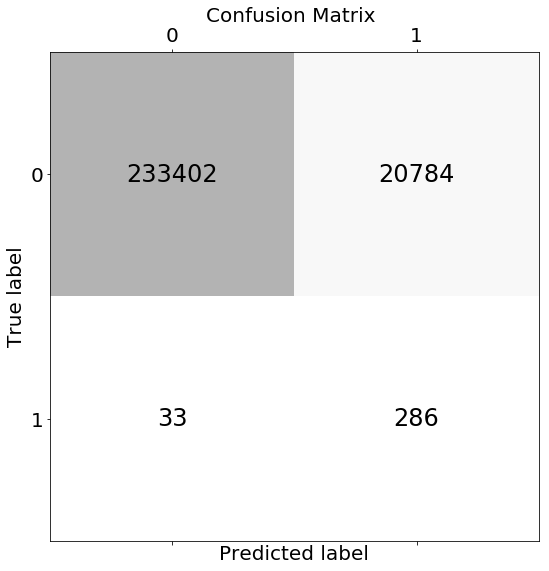

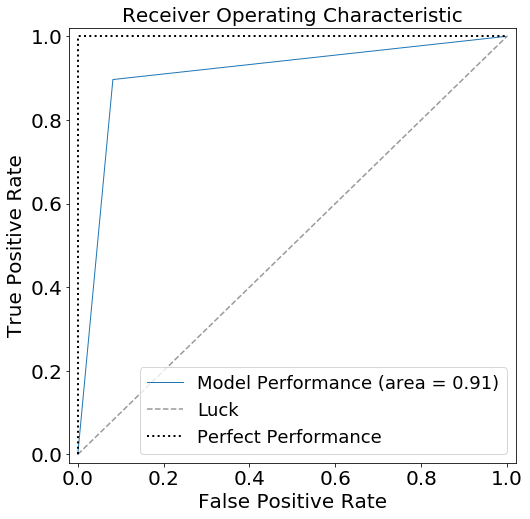

In [14]:
Oversampling(X_train, X_test, y_train, y_test, RandomOverSampler()) 
#RandomOverSampler

Before resampling: [(0, 1016742), (1, 1277)]
After resampling: [(0, 1016742), (1, 1016742)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1:  0.034446273218904304
Cohen Kappa:  0.03206532787484162
Brier:  0.06454097169014361
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    254186
           1       0.02      0.92      0.03       319

   micro avg       0.94      0.94      0.94    254505
   macro avg       0.51      0.93      0.50    254505
weighted avg       1.00      0.94      0.97    254505



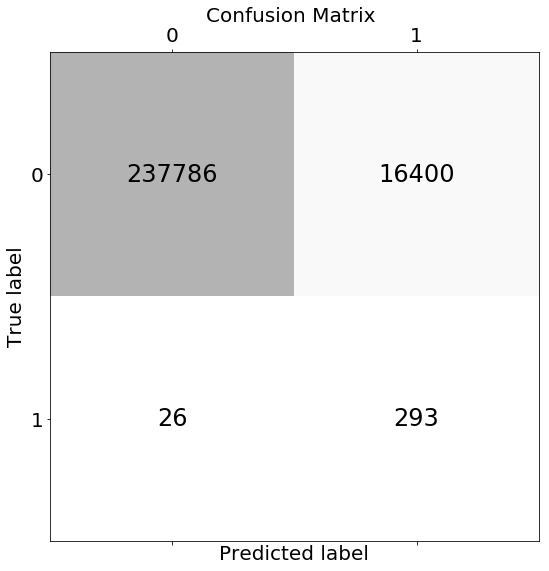

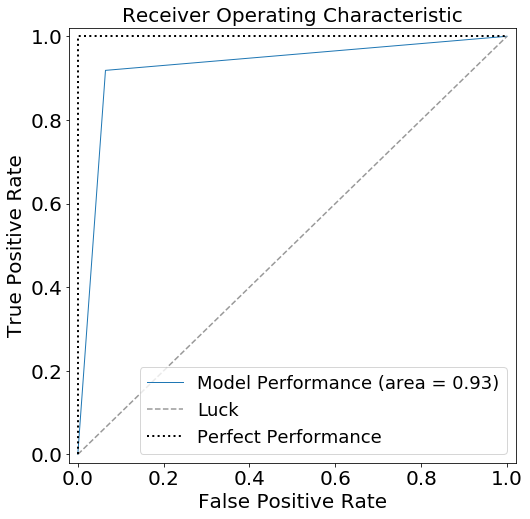

In [15]:
Oversampling(X_train, X_test, y_train, y_test, model,SMOTE())
#SMOTE()

Before resampling: [(0, 1016742), (1, 1277)]
After resampling: [(0, 1016742), (1, 1016764)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1:  0.02691205833839743
Cohen Kappa:  0.024500510709608236
Brier:  0.08808471346338971
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    254186
           1       0.01      0.97      0.03       319

   micro avg       0.91      0.91      0.91    254505
   macro avg       0.51      0.94      0.49    254505
weighted avg       1.00      0.91      0.95    254505



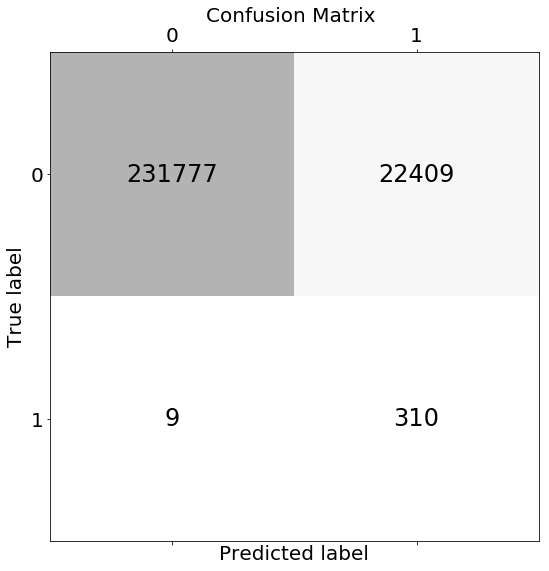

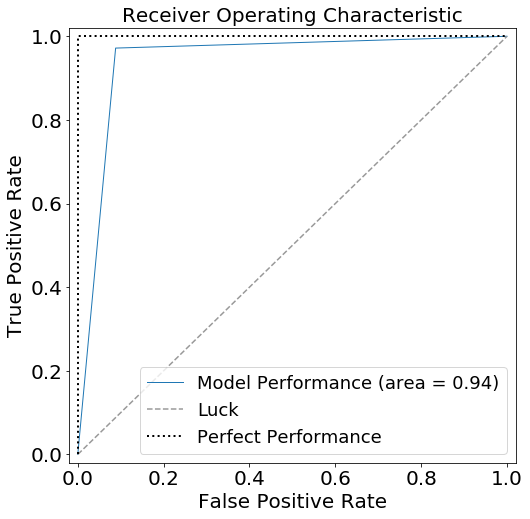

In [16]:
Oversampling(X_train, X_test, y_train, y_test, model,ADASYN())
#ADASYN()

Technique: RandomUnderSampler(random_state=None, ratio=None, replacement=False,
          return_indices=False, sampling_strategy='auto')
Before resampling: [(0, 1016742), (1, 1277)]
After resampling: [(0, 1277), (1, 1277)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.08483158 1.        ] [0.         0.89655172 1.        ]
F1:  0.02580295922049802
Cohen Kappa:  0.02338999667845376
Brier:  0.0848549144417595
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    254186
           1       0.01      0.90      0.03       319

   micro avg       0.92      0.92      0.92    254505
   macro avg       0.51      0.91      0.49    254505
weighted avg       1.00      0.92      0.95    254505



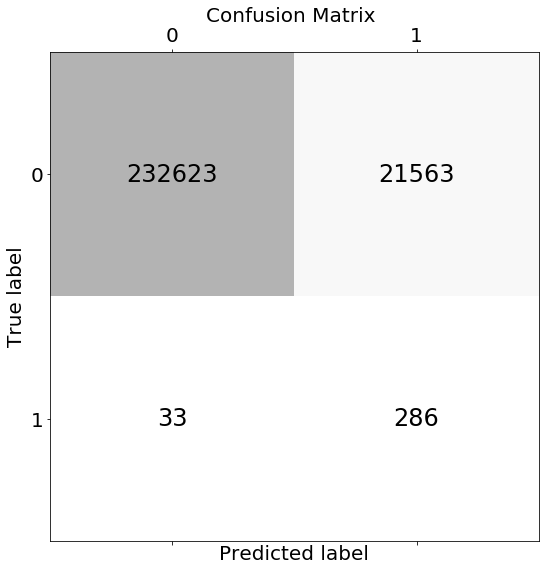

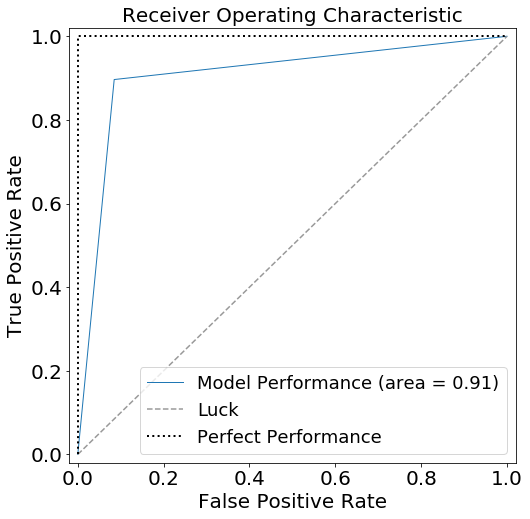

In [17]:
Undersampling(X_train, X_test, y_train, y_test, model,RandomUnderSampler())
#RandomUnderSampler()

Technique: EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
            random_state=None, ratio=None, return_indices=False,
            sampling_strategy='auto')
Before resampling: [(0, 1016741), (1, 1278)]
After resampling: [(0, 1015762), (1, 1278)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.00106221 1.        ] [0.        0.4169279 1.       ]
F1:  0.368421052631579
Cohen Kappa:  0.3675360838284554
Brier:  0.0017917133258678612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254186
           1       0.33      0.42      0.37       319

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.66      0.71      0.68    254505
weighted avg       1.00      1.00      1.00    254505



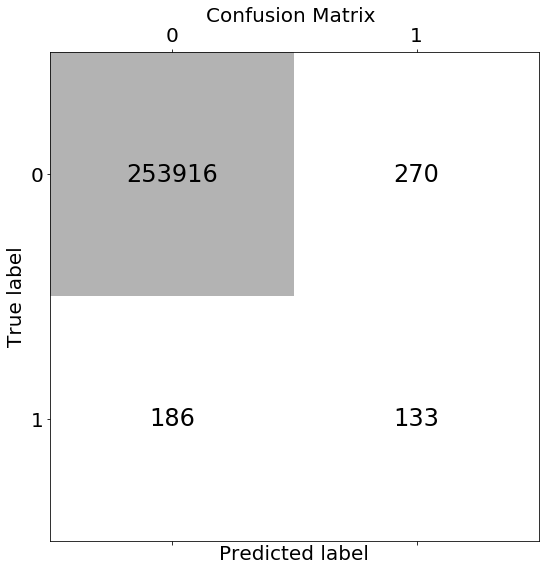

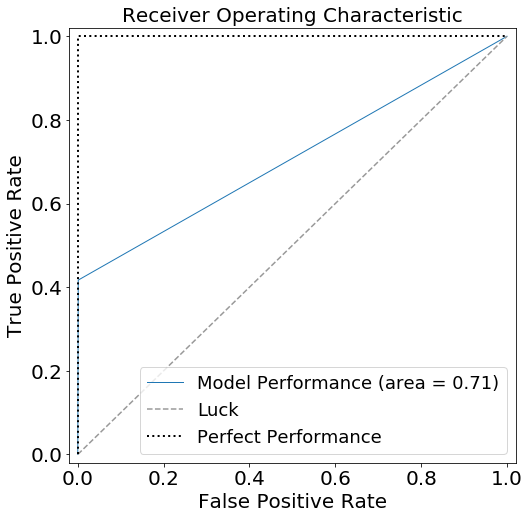

In [10]:
Undersampling(X_train, X_test, y_train, y_test, model,TomekLinks())
#TomekLinks()

Technique: TomekLinks(n_jobs=1, random_state=None, ratio=None, return_indices=False,
      sampling_strategy='auto')
Before resampling: [(0, 1016741), (1, 1278)]
After resampling: [(0, 1016533), (1, 1278)]


C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.00104648 1.        ] [0.        0.4169279 1.       ]
F1:  0.37047353760445684
Cohen Kappa:  0.3695953400445555
Brier:  0.0017759965423076167
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254186
           1       0.33      0.42      0.37       319

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.67      0.71      0.68    254505
weighted avg       1.00      1.00      1.00    254505



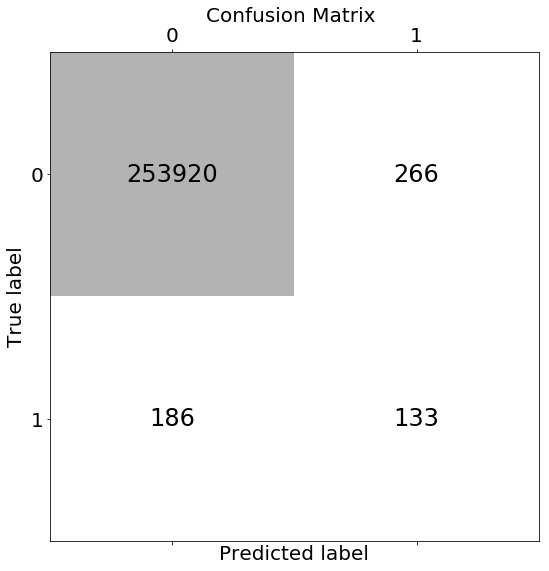

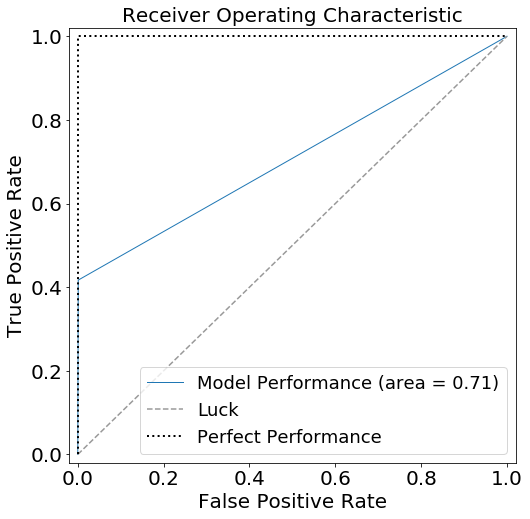

In [13]:
Undersampling(X_train, X_test, y_train, y_test, model,EditedNearestNeighbours())
#EditedNearestNeighbours()

In [15]:
#Nearmiss
Undersampling(X_train, X_test, y_train, y_test, model,Nearmiss())

In [16]:
Undersampling(X_train, X_test, y_train, y_test, model,NearMiss(version=2))
#NearMiss(version=2)